

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. and we are going to analyze it. 


### Question(s) for Analysis

1-Does Age affect the attendance?
2-Does Diseases affect the attendance?
3-does recieving SMS factor in the attendance
4-does gender factor in the attendance?
5-does Neigbourhood affect the precense for the appointments? 
6-does Neighbourhood and Age Correlate?
7-does being enroled in the Scholarship affect the attendance?


In [5]:
# importing libraries that will be used through out the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline 


In [37]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [148]:
# Load the data, and indexing by PatientId
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:
# shape of the entire data set. 
df.shape

(110527, 14)

In [150]:
#describing the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the mean age is 37 years old, max is 115, and the min is -1, which will be removed later in the data cleaning process. 
most of the patients are aged between 18-55 years old. 32% receieved SMS, and most of the patiants don't have and chronic diseases. 

In [151]:
# finding out if there's a NAN value in every column in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [152]:
# finding out if there're duplicated entries
df.duplicated().sum()

0

In [153]:
# since the only way to find a correlation between Patiants and reason for a visit, is through Patiants ID, 
#there's a need to check whether there's mulitple appointments for the same patiant
df['PatientId'].duplicated().sum()

48228

there're 48228 patiants that have multiple appointments

In [154]:
# idetnfying if there're multiple appointments for the same patiant and whether they showed for the appointment or not
df.duplicated(['PatientId','No-show','Gender']).sum()

38710

there're 38710 duplicated status between showing up, Gender and PatientId that will need to be removed. d

In [155]:
# getting the number of Neighbourhoods in the dataset
df['Neighbourhood'].nunique()

81

there are 81 unique Neighbourhood entries, we can use this later to deduce if there's a correlation between neighbourhood and
no-show

In [156]:
#After it was found out that minmum age is -1, which is obviously a mistake, it is only resonable to delete this row in the
#data cleaning process
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning


In [157]:
#removing the wrong age entry 
df.drop(index=99832, inplace=True)

In [158]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


  the wrong age entry now has been removed

In [159]:
#since the dataset is written in English, Hipertension is french word for Hypertension. this must be corrected
df.rename(columns={"Hipertension": "Hypertension"}, inplace=True)
#the encoding of the last column can be a little bit tricky, I renamed it. 
df.rename(columns={"No-show":"Abscent"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Abscent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [160]:
#remvoing duplicated appointments for the same patiants that didn't show up. 
df.drop_duplicates(['PatientId','Abscent','Gender'],inplace=True)

In [161]:
#removing of unnecessary data such as AppointmentID,ScheduledDay, Appointmentday
df.drop(columns=['AppointmentID','ScheduledDay','AppointmentDay','PatientId'],inplace=True)

In [162]:
#new shape of the dataset
df.shape

(71816, 10)

In [163]:
#view of the data set after removal of unwanted columns
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Abscent
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [214]:
df['Handcap']

5

<a id='eda'></a>
## Exploratory Data Analysis






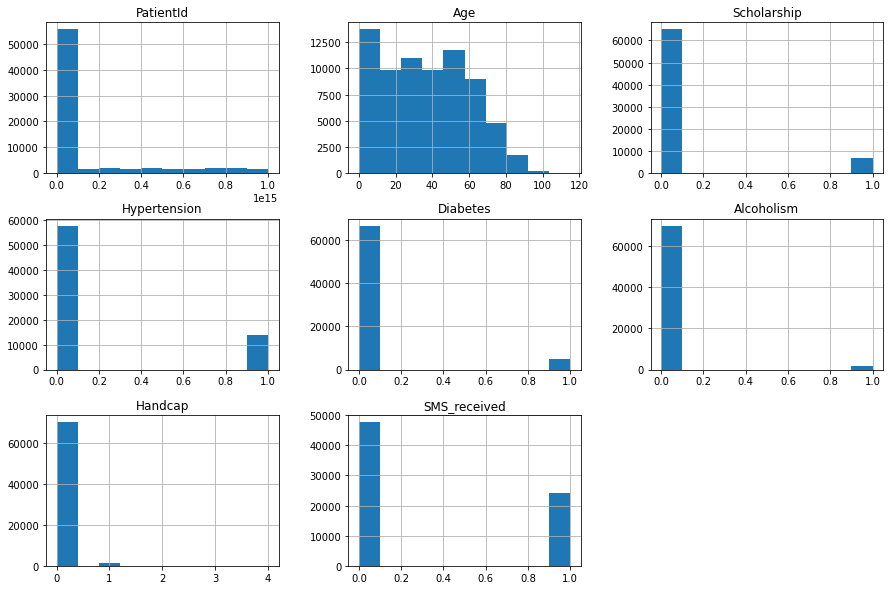

In [134]:
#plotting a General overview of the data analysis
df.hist(figsize=(15,10));

In [135]:
# since the outcome of the anaylsis is based on the Abscense of patiants
#i'm planning to catagorize this based on Absent or present as follows: 
Absent=df['Abscent']=='Yes'
Present=df['Abscent']=='No'


In [139]:
#checking if the code works. 
df[Present].count(), df[Absent].count()

(PatientId        54153
 Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 Abscent          54153
 dtype: int64,
 PatientId        17663
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 Abscent          17663
 dtype: int64)

there are 17663 that didn't show up for the appointment, where 54153 that did show for the appointment

In [168]:
#finding out the mean characterstics of those who didn't show up
df[Absent].mean()

<ipython-input-168-b95010565d7f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Absent].mean()


Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

In [167]:
#finding out the mean characterstics of those who showed up
df[Present].mean()

<ipython-input-167-5efcf0fd2dbb>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Present].mean()


Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64

# Research Questions 

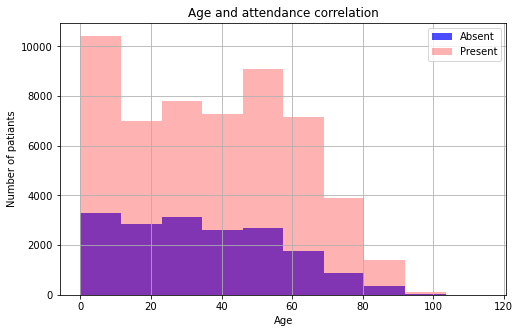

In [368]:
#Does Age affect the attendance?
plt.figure(figsize=[8,5]);
plt.title('Age and attendance correlation')
df['Age'][Absent].hist(label='Absent',color='blue',alpha=0.7);
df['Age'][Present].hist(label='Present',color='red',alpha=0.3);
plt.legend();
plt.xlabel('Age');
plt.ylabel('Number of patiants');


it appears that most of those who shows up for the appointments are agaed between 0-65 years old. and those who usually do not attend aged between 65-115 years old.

### Research Question 2  (Does Diseases affect the attendance)

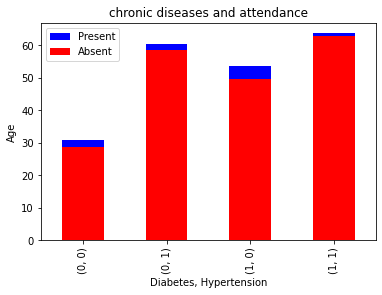

In [370]:
#Does Diseases affect the attendance?
df[Present].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', label='Present',color='blue');
df[Absent].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', label='Absent',color='red');
plt.legend();
plt.xlabel('Diabetes, Hypertension');
plt.ylabel('Age');
plt.title('chronic diseases and attendance');


those who tend to have any chronics disease such as diabetes or hypertension tends to miss their appointments much more, perhaps  house visits should be offered at the clinic.

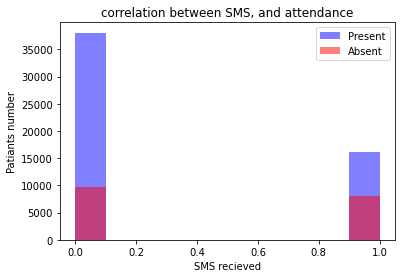

In [360]:
# does recieving SMS factor in the attendance? 
df['SMS_received'][Present].plot(kind='hist',color='blue',alpha=0.5,label='Present')
df['SMS_received'][Absent].plot(kind='hist',color='red',alpha=0.5,label='Absent')
plt.legend();
plt.xlabel('SMS recieved');
plt.ylabel('Patiants number');
plt.title('correlation between SMS, and attendance');

Strangly, the number of those who didn't recieve SMS and attended is greater than those who did recieve SMSs and didn't attend. 
meaning the SMS service could use some more work. 

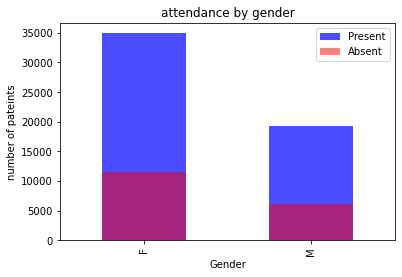

In [303]:
#does gender factor in the attendance?
df['Gender'][Present].value_counts().plot(kind='bar',label='Present',color='blue',alpha=0.7)
df['Gender'][Absent].value_counts().plot(kind='bar',label='Absent',color='red',alpha=0.5)
plt.legend();
plt.xlabel('Gender');
plt.ylabel('number of pateints');
plt.title('attendance by gender');

In [313]:
#number of present females and present males
female_present= df['Gender'][Present].value_counts()[0]
male_present=df['Gender'][Present].value_counts()[1]
female_present, male_present

(34960, 19193)

In [301]:
# Total number of males and females
df['Gender'].value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

In [330]:
#precentage of the attendees
female_attendees= female_present/46466
male_attendees=male_present/25350
female_attendees, male_attendees

(0.7523780828993243, 0.757120315581854)

it seems gender doesn't not factor in the attendance due to female number being greater than males.

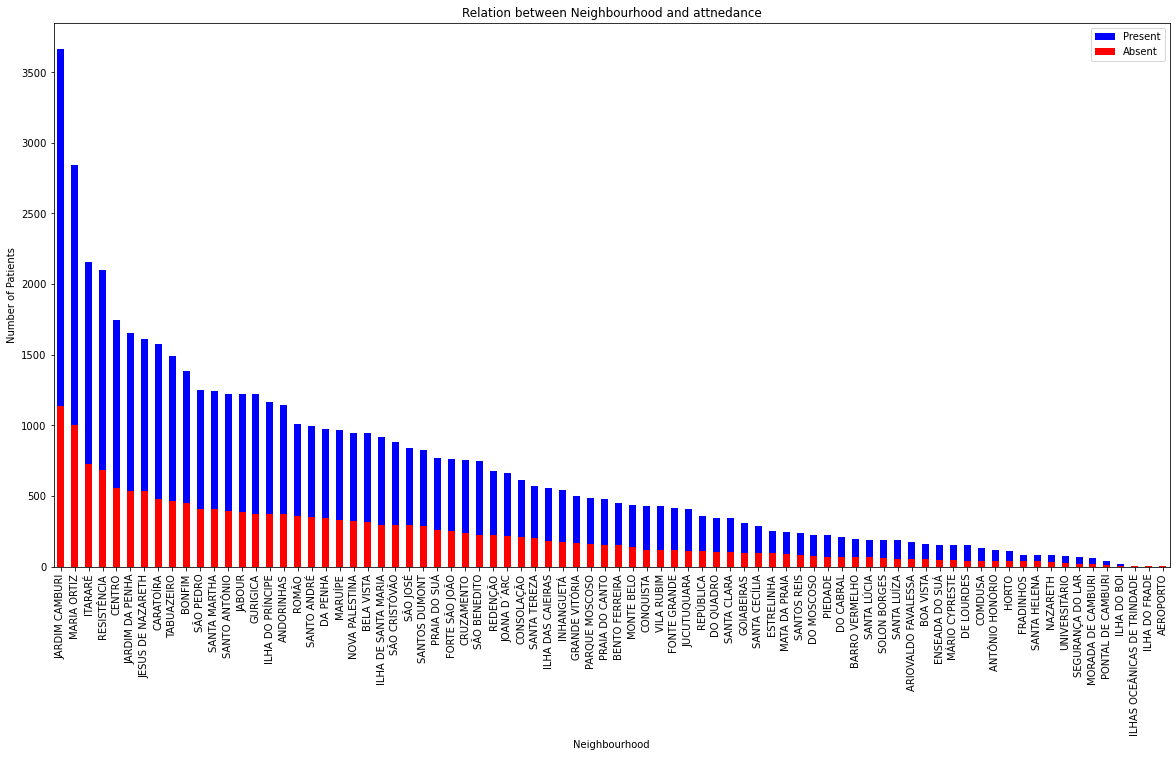

In [341]:
#does Neigbourhood affect the precense for the appointments? 
plt.figure(figsize=[20,10])
df['Neighbourhood'][Present].value_counts().plot(kind='bar',color='blue',label='Present');
df['Neighbourhood'][Absent].value_counts().plot(kind='bar',color='red',label='Absent');
plt.xlabel('Neighbourhood');
plt.ylabel('Number of Patients');
plt.title('Relation between Neighbourhood and attnedance');
plt.legend();


Neighbourhood does affect the attendance, as we can see in the graph.

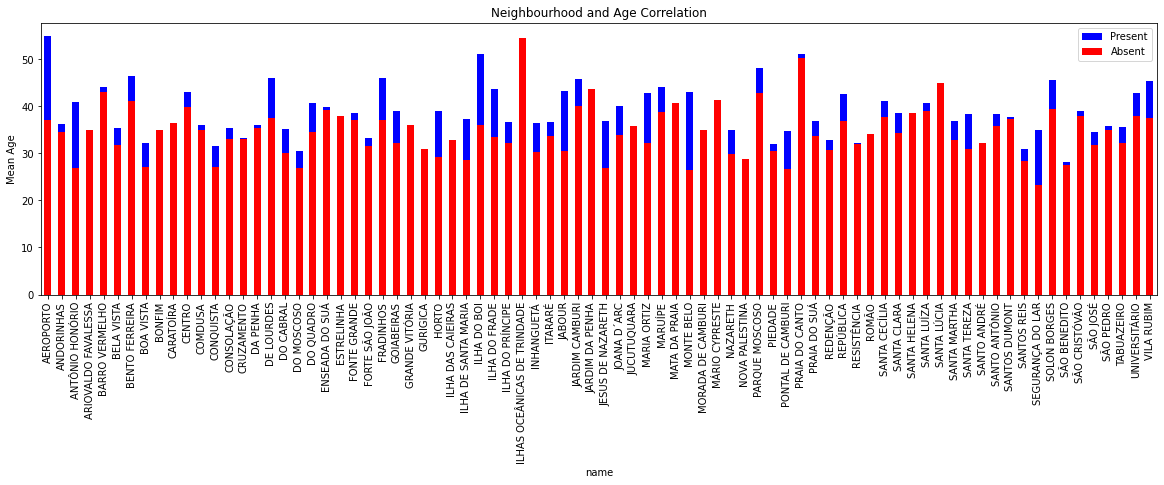

In [374]:
#does Neighbourhood and Age Correlate? 
def attendance(df,Name,show, no_show):
    plt.figure(figsize=[20,5])
    df[show].groupby(Name).Age.mean().plot(kind='bar',color='blue',label='Present');
    df[no_show].groupby(Name).Age.mean().plot(kind='bar',color='red',label='Absent');
    plt.legend();
    plt.xlabel('name');
    plt.ylabel('Mean Age');
    plt.title('Neighbourhood and Age Correlation');
attendance(df,'Neighbourhood',Present, Absent)


There are certain Neigbourhoods that Age doesn't factor in the attendance such as INHANGUETA, SANA CLARA
and there're other Neighbourhoods such as AEROPORTO AND ANTONIO HONORIO where mean of age above 35 tended to be present. 
INHANGUETA, SANA CLARA could be a little bit too far from hospital

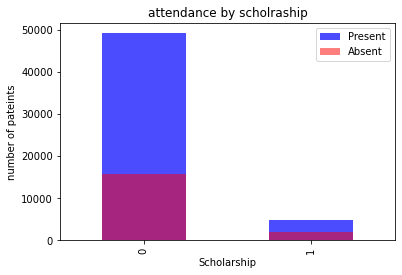

In [356]:
#does being enroled in the Scholarship affect the attendance? 
df['Scholarship'][Present].value_counts().plot(kind='bar',label='Present',color='blue',alpha=0.7)
df['Scholarship'][Absent].value_counts().plot(kind='bar',label='Absent',color='red',alpha=0.5)
plt.legend();
plt.xlabel('Scholarship');
plt.ylabel('number of pateints');
plt.title('attendance by scholraship');

strangely, being enroled in scholarship programme doesn't affect showing up for the appoitntment. most of the patiants are not enrolled in the scholarship programme

strangely, being enrolled in scholarships doesn't affect if the patiant show up or not. most of the patiants are not enrolled in 
scholarship programm

m<a id='conclusions'></a>
## Conclusions

1- Scholarships doesn't affect the attendance rate, most of the patiants are not enrolled in the scholarship programme 
2-There are certain Neigbourhoods that Age doesn't factor in the attendance such as INHANGUETA, SANA CLARA and there're other    Neighbourhoods such as AEROPORTO AND ANTONIO HONORIO where mean of age above 35 tended to be present. INHANGUETA, SANA CLARA could be a little bit too far from hospital.
3- Neighbourhood does affect the attendance.
4- the SMS service could use some more work, because it doesn't work as intended. The number of those who didn't receieve and attended is much greater than those who did and didn't attend.
5- those who tend to have any chronics disease such as diabetes or hypertension tends to miss their appointments much more, perhaps house visits should be offered at the clinic.
6-it appears that most of those who shows up for the appointments are agaed between 0-65 years old. and those who usually do not attend aged between 65-115 years old.

### Limitations
there are no direct correlation between the precense and Gender or the scholarship.


In [372]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1